# “The Last Great Race on Earth®”

### Introduction

The Iditarod Trail, now a National Historic Trail, had its beginnings as a mail and supply route from the coastal towns of Seward and Knik to the interior mining camps at Flat, Ophir, Ruby and beyond to the west coast communities of Unalakleet, Elim, Golovin, White Mountain and Nome. Ranging over 1,000 miles from Anchorage, in south central Alaska, to Nome on the western Bering Sea coast. Mail and supplies went in. Gold came out. All via dog sled. In 1925, part of the Iditarod Trail became a life saving highway for epidemic-stricken Nome. Diphtheria threatened and serum had to be brought in; again by intrepid dog mushers and their faithful hard-driving dogs.  Throughout the years, the sled dogs were important to day to day life in the villages and throughout Alaska.  

The first Iditarod race to Nome started March 3, 1973. Every year, men and women dog sled teams battle the harsh Alaskan elements in the “Last Great Race on Earth®”. The race route is alternated every year, one year going north through Cripple, Ruby and Galena, the next year south through Iditarod, Shageluk, Anvik. 

Visit <a href="https://iditarod.com/">the Iditarod website</a> for more delightful information about The Last Great Race!

For this project, some fun facts and figures about the 2017 Iditarod Race will be analyzed and visualized to answer questions such as:
<ul>
    <li>Did veteran teams outpace rookie teams?</li>
    <li>Did the number of dogs per team impact the successful outcome?</li>
    <li>What eating venues are in Nome, the endpoint of the Iditarod Trail?</li>
     </ul>
     
Answers to these questions are  important to the mushers who spend an entire year getting ready and raising the money needed to get to Nome. Some prepare around a full-time job. In addition to planning the equipment and feeding needs for themselves and their 16-dog teams for up to three weeks on the trail, hundreds of hours and hundreds of miles of training have to be put on each dog team. 

### Data

The dataset for this analysis was retrieved from Kaggle at: https://www.kaggle.com/iditarod/iditarod-race
It includes the musher's name, number and country, checkpoint name and location, distance in miles from the last checkpoint, time from departure at the last checkpoint, date and time of arrival and departure, layover time at the checkpoint, and the number of dogs at arrival and departure at each checkpoint.

Foursquare location data will be used in this project to discover points of interest in the cities of Anchorage, Fairbanks, and/or Nome.


## Setup

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

# geopy library to get the latitude and longitude values.
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.68 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  24.29 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.84 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  31.53 MB/s
vincent-0.4.4- 100% |###################

In [2]:
# The code was removed by Watson Studio for sharing.

,Number,Name,Status,Country,Checkpoint,Latitude,Longitude,Distance,Time,Speed,Arrival Date,Arrival Time,Arrival Dogs,Elapsed Time,Departure Date,Departure Time,Departure Dogs
1126,54,Geir Idar Hjelvik,Veteran,Norway,Nome,64.4964,-165.3996,22.0,3.12,7.06,03/17/2017,08:05:19,13.0,0.0,NaN,NaN,NaN
1127,46,Charley Bejna,Veteran,United States,Nome,64.4964,-165.3996,22.0,3.23,6.80,03/17/2017,09:30:21,10.0,0.0,NaN,NaN,NaN
1128,22,DeeDee Jonrowe,Veteran,United States,Nome,64.4964,-165.3996,22.0,2.82,7.81,03/17/2017,10:03:37,12.0,0.0,NaN,NaN,NaN
1129,19,Gunnar Johnson,Veteran,United States,Nome,64.4964,-165.3996,22.0,3.02,7.29,03/17/2017,10:04:06,11.0,0.0,NaN,NaN,NaN
1130,48,Justin High,Rookie,United States,Nome,64.4964,-165.3996,22.0,3.27,6.73,03/17/2017,12:14:35,9.0,0.0,NaN,NaN,NaN
1131,72,Dave Delcourt,Rookie,United States,Nome,64.4964,-165.3996,22.0,2.82,7.81,03/17/2017,12:18:08,10.0,0.0,NaN,NaN,NaN
1132,49,Justin Stielstra,Rookie,United States,Nome,64.4964,-165.3996,22.0,3.45,6.38,03/17/2017,13:44:36,11.0,0.0,NaN,NaN,NaN
1133,67,Trent Herbst,Veteran,United States,Nome,64.4964,-165.3996,22.0,3.63,6.06,03/17/2017,14:51:14,8.0,0.0,NaN,NaN,NaN
1134,17,Kristin Bacon,Veteran,United States,Nome,64.4964,-165.3996,22.0,3.35,6.57,03/17/2017,17:45:43,12.0,0.0,NaN,NaN,NaN
1135,4,Misha Wiljes,Rookie,Czech Republic,Nome,64.4964,-165.3996,22.0,3.72,5.92,03/17/2017,21:37:20,12.0,0.0,NaN,NaN,NaN


## Explore the Data

In [3]:
df.shape

(1146, 17)

In [4]:
df.columns

Index(['Number', 'Name', 'Status', 'Country', 'Checkpoint', 'Latitude',
       'Longitude', 'Distance', 'Time', 'Speed', 'Arrival Date',
       'Arrival Time', 'Arrival Dogs', 'Elapsed Time', 'Departure Date',
       'Departure Time', 'Departure Dogs'],
      dtype='object')

In [5]:
df.dtypes

Number              int64
Name               object
Status             object
Country            object
Checkpoint         object
Latitude          float64
Longitude         float64
Distance          float64
Time              float64
Speed             float64
Arrival Date       object
Arrival Time       object
Arrival Dogs      float64
Elapsed Time      float64
Departure Date     object
Departure Time     object
Departure Dogs    float64
dtype: object

In [6]:
print("Number of registered dog teams: ", len(df['Name'].unique()))

Number of registered dog teams:  72


In [7]:
df_country = df['Name'].groupby(df['Country'])
print('\nDog teams, by')
print(df_country.nunique().sort_values())


Dog teams, by
Country
Czech Republic     1
England            1
Hungary            1
Sweden             1
Canada             2
France             2
Norway             4
United States     60
Name: Name, dtype: int64


## Race route, 2017
<table align="left">
<thead>
<th>Checkpoints</th>
<th>Distance between Checkpoints*</th>
<th>Cumulative</th>
<th>Distance to Nome</th>
</thead>
<tr>
<td><a title="Anchorage to Campbell Airstrip" href="https://iditarod.com/about/the-iditarod-trail/anchorage-to-campbell-airstrip/">Anchorage to Campbell Airstrip</a></td>
<td>11</td>
<td>11</td>
<td>968</td>
</tr>
<tr>
<td>Fairbanks to Nenana</td>
<td>60</td>
<td>71</td>
<td>908</td>
</tr>
<tr>
<td>Nenana to Manley</td>
<td>90</td>
<td>161</td>
<td>818</td>
</tr>
<tr>
<td>Manley to Tanana</td>
<td>66</td>
<td>227</td>
<td>752</td>
</tr>
<tr>
<td>Tanana to Ruby</td>
<td>119</td>
<td>346</td>
<td>633</td>
</tr>
<tr>
<td><a title="Ruby to Galena" href="https://iditarod.com/about/the-iditarod-trail/ruby-to-galena/">Ruby to Galena</a></td>
<td>50</td>
<td>396</td>
<td>583</td>
</tr>
<tr>
<td>Galena to Huslia</td>
<td>82</td>
<td>478</td>
<td>501</td>
</tr>
<tr>
<td>Huslia to Koyukuk</td>
<td>86</td>
<td>564</td>
<td>415</td>
</tr>
<tr>
<td>Koyukuk to Nulato</td>
<td>22</td>
<td>586</td>
<td>393</td>
</tr>
<tr>
<td><a title="Nulato to Kaltag" href="https://iditarod.com/about/the-iditarod-trail/nulato-to-kaltag/">Nulato to Kaltag</a></td>
<td>47</td>
<td>633</td>
<td>346</td>
</tr>
<tr>
<td><a title="Kaltag to Unalakleet" href="https://iditarod.com/about/the-iditarod-trail/kaltag-to-unalakleet/">Kaltag to Unalakleet</a></td>
<td>85</td>
<td>718</td>
<td>261</td>
</tr>
<tr>
<td><a title="Unalakleet to Shaktoolik" href="https://iditarod.com/about/the-iditarod-trail/unalakleet-to-shaktoolik/">Unalakleet to Shaktoolik</a></td>
<td>40</td>
<td>758</td>
<td>221</td>
</tr>
<tr>
<td><a title="Shaktoolik to Koyuk" href="https://iditarod.com/about/the-iditarod-trail/shaktoolik-to-koyuk/">Shaktoolik to Koyuk</a></td>
<td>50</td>
<td>808</td>
<td>171</td>
</tr>
<tr>
<td><a title="Koyuk to Elim" href="https://iditarod.com/about/the-iditarod-trail/koyuk-to-elim/">Koyuk to Elim</a></td>
<td>48</td>
<td>856</td>
<td>123</td>
</tr>
<tr>
<td><a title="Elim to Golovin" href="https://iditarod.com/about/the-iditarod-trail/elim-to-golovin/">Elim to Golovin</a></td>
<td>28</td>
<td>884</td>
<td>95</td>
</tr>
<tr>
<td><a title="Golovin to White Mountain" href="https://iditarod.com/about/the-iditarod-trail/golovin-to-white-mountain/">Golovin to White Mountain</a></td>
<td>18</td>
<td>902</td>
<td>77</td>
</tr>
<tr>
<td><a title="White Mountain to Safety" href="https://iditarod.com/about/the-iditarod-trail/white-mountain-to-safety/">White Mountain to Safety</a></td>
<td>55</td>
<td>957</td>
<td>22</td>
</tr>
<tr>
<td><a title="Safety to Nome" href="https://iditarod.com/about/the-iditarod-trail/safety-to-nome/">Safety to Nome</a></td>
<td>22</td>
<td>979</td>
<td>0</td>
</tr>
<tr>
<td style="text-align: center;" colspan="3"><strong>Total Distance</strong></td>
<td>979</td>
</tr>
</table>

## Iditarod Trail, 2017 checkpoints, mapped

In [8]:
# get Alaska coordinates

address = 'Alaska'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geo coordinates of Alaska are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geo coordinates of Alaska are 64.4459613, -149.680909.


In [9]:
# create df of checkpoints coords for mapping
df_checks = df[['Checkpoint','Latitude','Longitude']]
df_checks.drop_duplicates()

,Checkpoint,Latitude,Longitude
0,Fairbanks,64.8321,-147.8130
72,Nenana,64.5952,-149.0897
143,Manley,65.0317,-150.6352
214,Tanana,65.2010,-152.0816
285,Ruby,64.7386,-155.5011
355,Galena,64.7322,-156.9352
424,Huslia,65.6568,-156.4550
492,Koyukuk,64.8431,-157.8039
560,Nulato,64.7188,-158.1046
627,Kaltag,64.3138,-158.7257


In [10]:
# create map of Alska using latitude and longitude values and mark the checkpoints
map_alaska = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, cp in zip(df_checks['Latitude'], df_checks['Longitude'], df_checks['Checkpoint']):
    label = '{}'.format(cp)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alaska)  
    
map_alaska


The race officially starts at Fairbanks, and the route generally heads west. The run up to Huslia from Galena, and then back down to Koyukuk is quite a long way!

In [11]:
print("Teams, arrivals at checkpoint:\n\n", df['Checkpoint'].value_counts())

Teams, arrivals at checkpoint:

 Fairbanks         72
Manley            71
Nenana            71
Tanana            71
Ruby              70
Galena            69
Koyukuk           68
Huslia            68
Nulato            67
Kaltag            67
Shaktoolik        66
Unalakleet        66
Nome              64
White Mountain    64
Koyuk             64
Safety            64
Elim              64
Name: Checkpoint, dtype: int64


One team didn't make it to Nenana, the second checkpoint, and there were dropouts along the way, but 64 teams out of 72 made it to Nome!

In [12]:
# drop the one team that didn't make it to the first checkpoint
print(df.loc[df['Elapsed Time'].isnull(),:])

   Number         Name  Status  Country Checkpoint  Latitude  Longitude  \
1       3  Otto Balogh  Rookie  Hungary  Fairbanks   64.8321   -147.813   

   Distance  Time  Speed Arrival Date Arrival Time  Arrival Dogs  \
1       NaN   0.0    NaN          NaN          NaN           NaN   

   Elapsed Time Departure Date Departure Time  Departure Dogs  
1           NaN            NaN            NaN             NaN  


In [13]:
df= df.loc[~df['Elapsed Time'].isnull(), :]
df.shape

(1145, 17)

Veteran    55
Rookie     16
Name: Status, dtype: int64


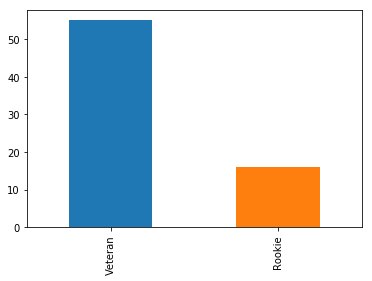

In [14]:
# number veterans vs. rookie teams

df_stat = df.drop_duplicates(['Name'])[['Name', 'Status']].set_index('Name')
print(df_stat['Status'].value_counts())
df_stat['Status'].value_counts().plot(kind="bar")

It is not surprising that the Iditarod competitors are mostly veterans because it takes a lot of time, effort, money, and skill to participate.

In [15]:
# what are the teams that made it to Nome
nome = df['Checkpoint'] == 'Nome'
df_nome = df[nome]

In [26]:
df_nome.shape

(64, 17)

## Team segmentation with K-means

In [28]:
# Let's look at the teams with respect to time, speed, and number of dogs in the team at the finish line.
# Trim down the df with only the necessary columns

df_k = df_nome[['Number','Time','Speed','Arrival Dogs']]

In [30]:
# setting first name as index column 
df_k.set_index("Number", inplace = True) 

In [33]:
df_k.head()

,Time,Speed,Arrival Dogs
Number,,,
16,2.50,8.80,11.0
18,2.58,8.52,7.0
24,2.45,8.98,13.0
38,3.03,7.25,8.0
37,3.08,7.14,16.0


In [35]:
# normalize the data
from sklearn.preprocessing import StandardScaler
X = df_k.values[:,:]
#X = np.nan_to_num(X)
clus_df = StandardScaler().fit_transform(X)
clus_df

array([[-1.25761199,  1.91027668,  0.34391797],
       [-1.09533947,  1.58055064, -1.65705931],
       [-1.35903231,  2.12224343,  1.34440661],
       [-0.18255658,  0.0850075 , -1.15681499],
       [-0.08113626, -0.04452774,  2.84513957],
       [ 0.60852193, -0.86884285, -0.65657067],
       [-0.54766974,  0.63847622, -0.65657067],
       [ 0.        , -0.13873518, -0.65657067],
       [ 0.50710161, -0.76285948, -0.15632635],
       [-0.30426096,  0.28519831, -1.15681499],
       [-1.25761199,  1.91027668,  0.84416229],
       [-0.50710161,  0.57959657, -0.65657067],
       [ 0.        , -0.13873518,  0.84416229],
       [ 0.36511316, -0.59799646, -0.65657067],
       [-0.40568129,  0.42650947, -0.65657067],
       [ 0.26369284, -0.48023715, -0.65657067],
       [ 0.12170439, -0.31537413, -0.65657067],
       [ 0.73022632, -1.01015402, -1.15681499],
       [ 0.73022632, -1.01015402, -1.15681499],
       [ 0.02028406, -0.1858389 , -0.65657067],
       [-0.58823787,  0.68557994, -0.656

In [38]:
# Model
from sklearn.cluster import KMeans 

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 1 2 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 2 1
 1 2 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 2 1 0 1 1 0 0 2 1 0]


In [39]:
df_k["Clus_km"] = labels
df_k.head(5)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Time,Speed,Arrival Dogs,Clus_km
Number,,,,
16,2.50,8.80,11.0,0
18,2.58,8.52,7.0,1
24,2.45,8.98,13.0,0
38,3.03,7.25,8.0,1
37,3.08,7.14,16.0,2


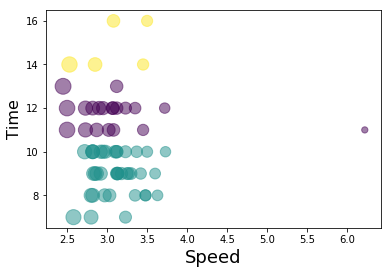

In [41]:
# Now, lets look at the distribution of teams based on their speed and time:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Time', fontsize=16)

plt.show()

What is the situation with the outlier?

In [42]:
df_k['Speed'].unique()

array([ 8.8 ,  8.52,  8.98,  7.25,  7.14,  6.44,  7.72,  7.06,  6.53,
        7.42,  7.67,  6.67,  7.54,  6.77,  6.91,  6.32,  7.02,  7.76,
        7.81,  7.86,  6.8 ,  5.89,  7.1 ,  6.57,  8.1 ,  7.37,  7.59,
        8.68,  3.54,  8.05,  7.29,  6.73,  6.38,  6.06,  5.92,  6.29,
        7.46,  7.17,  6.11])

In [43]:
df_k[df_k['Speed'] < 5]

,Time,Speed,Arrival Dogs,Clus_km
Number,,,,
28,6.22,3.54,11.0,0


In [44]:
df_nome[df_nome['Number'] == 28]

,Number,Name,Status,Country,Checkpoint,Latitude,Longitude,Distance,Time,Speed,Arrival Date,Arrival Time,Arrival Dogs,Elapsed Time,Departure Date,Departure Time,Departure Dogs
1124,28,Jodi Bailey,1,United States,Nome,64.4964,-165.3996,22.0,6.22,3.54,03/17/2017,05:41:40,11.0,0.0,NaN,NaN,NaN


Nice job, Jodi - slow but steady gets you to the finish line!

## The finishers make it to Nome!

Let's check what's going on around the tiny town of Nome.

In [46]:
# set up credentials
CLIENT_ID = 'KXGUNH5COL4Z4GWUZAWHIKS0LZPOCYP5RWZLD4NLMY5AVBIP' # your Foursquare ID
CLIENT_SECRET = 'XT2AQEAGPUGLBE1MOAUMQNBCDAMGQVVDXWHGABRTRHOQIAH4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KXGUNH5COL4Z4GWUZAWHIKS0LZPOCYP5RWZLD4NLMY5AVBIP
CLIENT_SECRET:XT2AQEAGPUGLBE1MOAUMQNBCDAMGQVVDXWHGABRTRHOQIAH4


In [61]:
address = 'Nome, AK'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


64.4989922 -165.398799443163


In [70]:
# set up criteria for search
search_query = 'restaurant'
radius = 500
print(search_query + ' .... OK!')

restaurant .... OK!


In [71]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [72]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c33c463351e3d26242fa211'},
 'response': {'venues': [{'categories': [],
    'hasPerk': False,
    'id': '4de6a04bd4c0294e3afa2f9b',
    'location': {'cc': 'US',
     'city': 'Nome',
     'country': 'United States',
     'distance': 456,
     'formattedAddress': ['Nome, AK 99762', 'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 64.49771116447758,
       'lng': -165.40784140815757}],
     'lat': 64.49771116447758,
     'lng': -165.40784140815757,
     'postalCode': '99762',
     'state': 'AK'},
    'name': 'Husky Restaurant',
    'referralId': 'v-1546896483'}]}}

In [73]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4de6a04bd4c0294e3afa2f9b,US,Nome,United States,456,"[Nome, AK 99762, United States]","[{'lat': 64.49771116447758, 'label': 'display'...",64.497711,-165.407841,99762,AK,Husky Restaurant,v-1546896483


Well, one restaurant is better than none!

In [74]:
# let's check out Husky Restaurant
venue_id = '4de6a04bd4c0294e3afa2f9b' # ID of Husky Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)


In [75]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['hereNow', 'location', 'pageUpdates', 'timeZone', 'contact', 'canonicalUrl', 'ok', 'createdAt', 'dislike', 'attributes', 'photos', 'shortUrl', 'name', 'likes', 'bestPhoto', 'categories', 'tips', 'verified', 'id', 'beenHere', 'listed', 'reasons', 'inbox', 'specials', 'stats'])


{'attributes': {'groups': []},
 'beenHere': {'count': 0,
  'lastCheckinExpiredAt': 0,
  'marked': False,
  'unconfirmedCount': 0},
 'bestPhoto': {'createdAt': 1339191597,
  'height': 540,
  'id': '4fd2712de4b03b5ad9536036',
  'prefix': 'https://fastly.4sqi.net/img/general/',
  'source': {'name': 'Foursquare for iOS',
   'url': 'https://foursquare.com/download/#/iphone'},
  'suffix': '/wDRmPQFj0cJNz5RmxxiHa3msLH-Zwz8VsntqxlvJKBc.jpg',
  'visibility': 'public',
  'width': 720},
 'canonicalUrl': 'https://foursquare.com/v/husky-restaurant/4de6a04bd4c0294e3afa2f9b',
 'categories': [],
 'contact': {},
 'createdAt': 1306959947,
 'dislike': False,
 'hereNow': {'count': 0, 'groups': [], 'summary': 'Nobody here'},
 'id': '4de6a04bd4c0294e3afa2f9b',
 'inbox': {'count': 0, 'items': []},
 'likes': {'count': 0, 'groups': []},
 'listed': {'count': 0,
  'groups': [{'count': 0,
    'items': [],
    'name': 'Lists from other people',
    'type': 'others'}]},
 'location': {'cc': 'US',
  'city': 'Nome',
 

In [76]:
# does Husky Restaurant have any ratings?
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


## Conclusion

In this notebook, the 2017 Iditarod race with a starting point of Fairbanks, Alaska, to the tiny town of Nome on the Bering Sea was reviewed. From Fairbanks, 72 dog sled teams set out, and 64 teams made it through treacherous conditions to make it to Nome. 